In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
from google.colab import files
files.upload() # Upload your kaggle.json here

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [ ]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extract
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('DOne')

DOne


In [ ]:
# extract train dataset
dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Train extracted')

Train extracted


In [ ]:
# count file
import os

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("dirs", dirs)
print('Number of images: ', file_count)

dirs []
Number of images:  25000


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names[10])

import library

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
def displayImage(path):
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.show()

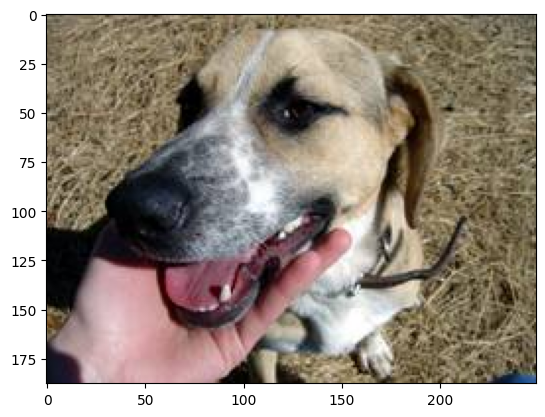

In [ ]:
# display
displayImage('/content/train/dog.3171.jpg')


In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):
  name = file_names[i]
  print(name[0:3])

dog
dog
dog
dog
cat


In [ ]:
# count dog cat images
file_names = os.listdir('/content/train/')

dog = 0
cat = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog += 1
  else:
    cat += 1

print('dog =', dog)
print('cat =', cat)

dog = 12500
cat = 12500


resizing images

In [ ]:
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

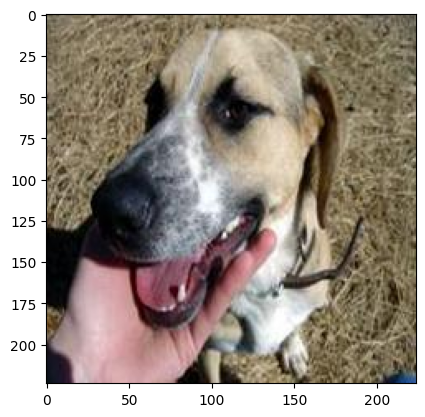

In [ ]:
displayImage("/content/image resized/dog.3171.jpg")

create label for resized images

cat = 0

dog = 1

In [ ]:
# create label
filenames = os.listdir('/content/image resized/')
labels = []

for i in filenames:
  label = i[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

print(labels[0:5])
print(len(labels))

['dog.7088.jpg', 'dog.3171.jpg', 'dog.1690.jpg', 'dog.1385.jpg', 'cat.8660.jpg']
2000
[1, 1, 1, 1, 0]
2000


In [ ]:
# counting dogs and cats from resized images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1018  982]


convert images to np array

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
dog_cat_images

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
dog_cat_images.shape

(2000, 224, 224, 3)

train test split

In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 - training images

400 - test images

In [ ]:
# scaling
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled

Building the Neural Network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - acc: 0.7798 - loss: 0.4643
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - acc: 0.9749 - loss: 0.0815
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - acc: 0.9721 - loss: 0.0795
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - acc: 0.9804 - loss: 0.0663
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - acc: 0.9841 - loss: 0.0529


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - acc: 0.9591 - loss: 0.0931
Test Loss = 0.0833163633942604
Test Accuracy = 0.9649999737739563


predict

In [ ]:
def predict():
  input_image_path = input('Path of the image to be predicted: ')

  input_image = cv2.imread(input_image_path)

  cv2_imshow(input_image)

  input_image_resize = cv2.resize(input_image, (224,224))

  input_image_scaled = input_image_resize/255

  image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

  input_prediction = model.predict(image_reshaped)

  print(input_prediction)

  input_pred_label = np.argmax(input_prediction)

  print(input_pred_label)

  if input_pred_label == 0:
    print('The image represents a Cat')

  else:
    print('The image represents a Dog')

Path of the image to be predicted: /content/white-cat-breeds-kitten-in-grass-67bf648a54a3b.avif


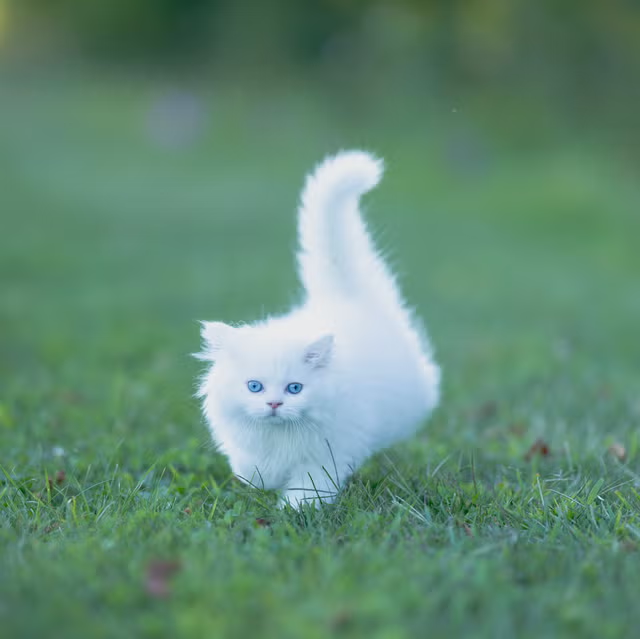

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
[[ 0.6100075 -1.3398194]]
0
The image represents a Cat


In [ ]:
predict()

Path of the image to be predicted: /content/beagle-hound-dog.webp


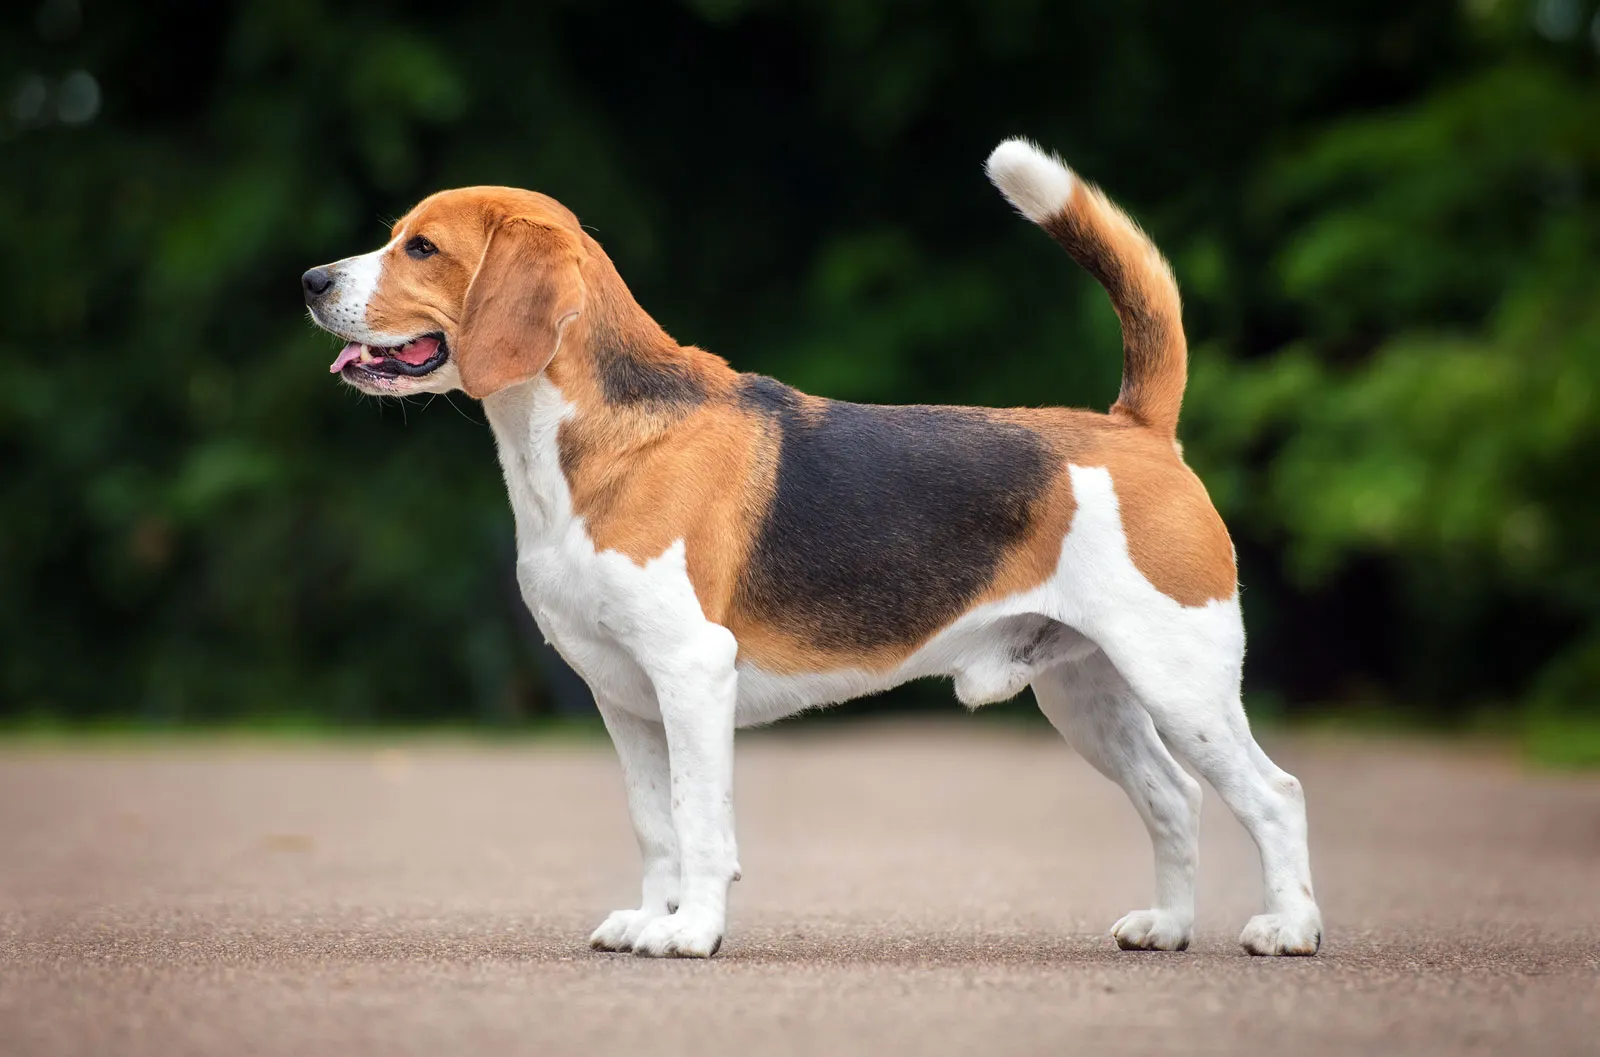

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
[[-2.6633031  3.6768048]]
1
The image represents a Dog


In [ ]:
predict()